In [1]:
from rhana.pattern import *

In [2]:
from rhana.spectrum.spectrum import *

In [3]:
from rhana.labeler.unet import *

In [4]:
from functools import partial

In [5]:
from rhana.io.kashiwa import *

In [6]:
ls ../data/masking/

allitems.csv  IT005/  IT009/  IT013/  IT017/      peak_distances_v2/  vline/
export.pkl    IT006/  IT010/  IT014/  IT018/      phase/
IT003/        IT007/  IT011/  IT015/  labels.csv  semantic_all.csv
IT004/        IT008/  IT012/  IT016/  mask/       tracking_merge/


In [7]:
root = Path("~/RHEED").expanduser() # where the data is stored

In [8]:
!ls {root}

 2d3dprediction			       MGI-RHEED
 activation			       Multi-label-seg.ipynb
 all_images_cut_ds_new.p	       ObjectIntensity.ipynb
 all_images_cut_ds_new.zip	       ObjectLocalization.py
 analysis			      'Objects Localization.ipynb'
 build_database.ipynb		       ObjectTracking.ipynb
 CNN-dataset-construct.ipynb	       objecttracking.py
 data				       paper
 DeepUnsuperviseLearning.ipynb	       PaperAndBook
 draft.py			       PaperDemostration.ipynb
 DynamicPhaseMapping.ipynb	       __pycache__
 EDA_AFM.ipynb			       remote
 EDA-Copy1.ipynb		       remote.zip
 EDA.ipynb			       Report
 EDA_RHEED.ipynb		       result
 EDA_XRD.ipynb			       RHEED_Analayis_base.csv
 Fastai-CNN-pretrained.ipynb	       RHEED_Analayis_base.pkl
 fastai_data			      'RHEED library-HC.ipynb'
 FastaiImageSeg.ipynb		      'RHEED library  .ipynb'
 G3dtest.html			      'RHEED library-plaueC.ipynb'
 git				       saliency
 GRHEED.ipynb			       salinecy
 Gtest.html			       SegmentTheWhole.ipynb
 ImageProcessin

In [8]:
df_extra = pd.read_csv("../data/unet/index.csv", usecols=["crop_path", "crop_mask_spot", "crop_mask_streak"], index_col="crop_path")

In [9]:
df_extra = df_extra.rename(columns={"crop_mask_spot":"spot", "crop_mask_streak":"stripe"})

In [10]:
df_extra.head()

,spot,stripe
crop_path,,
/home/aurora/RHEED/UNetMask_crop/image/IT020/IT020-00000005708867607600-0070.png,16255 8 16652 13 17051 16 17448 20 17848 21 18246 24 18645 26 19043 28 19442 30 19842 30 20136 4 20241 31 20534 8 20640 32 20934 8 21039 33 21334 11 21438 34 21734 13 21837 34 22134 14 22237 34 22534 15 22636 14 22651 20 22935 14 23036 10 23052 19 23335 15 23435 11 23453 17 23735 15 23835 9 23854 16 24135 16 24234 10 24254 16 24535 16 24634 10 24655 14 24935 16 25034 10 25056 12 25335 17 25434 10 25459 8 25735 17 25834 10 25860 7 26135 17 26234 9 26265 2 26536 16 26634 9 26666 1 26936 16 27034 7 27064 4 27336 16 27434 6 27464 4 27737 15 27836 1 27861 7 28138 14 28260 8 28538 11 28659 9 289...,23866 1 24663 2 24666 2 25066 1 25246 1 25461 6 25646 1 25862 5 26045 3 26260 7 26445 3 26660 7 26845 1 27060 7 27460 7 27644 2 27859 6 28259 6 28661 1 28663 1 28841 1 29060 2 29063 1 29241 1 29641 1 30041 1
/home/aurora/RHEED/UNetMask_crop/image/IT020/IT020-00000005709364226300-0070.png,16256 3 16260 1 16653 12 17052 14 17449 19 17847 22 18246 24 18645 26 19042 29 19441 31 19840 32 20136 4 20239 33 20534 8 20638 34 20934 8 21038 34 21334 11 21437 35 21734 13 21837 35 22134 14 22236 35 22534 15 22636 35 22935 15 23035 15 23051 19 23335 15 23435 14 23452 18 23735 15 23835 11 23853 17 24135 16 24235 11 24254 16 24535 16 24634 11 24654 15 24935 16 25034 10 25055 14 25335 16 25434 10 25457 11 25735 16 25834 10 25858 10 26135 17 26234 10 26263 4 26536 16 26634 10 26664 3 26936 17 27035 8 27064 4 27337 16 27436 4 27462 6 27737 16 27862 6 28138 14 28260 8 28538 14 28659 9 28938 1...,24666 1 24668 1 25066 1 25463 5 25864 3 26262 6 26662 6 27062 5 27461 6 27860 4 28260 5
/home/aurora/RHEED/UNetMask_crop/image/IT020/IT020-00000005709860844900-0070.png,16254 7 16652 13 17050 17 17448 21 17847 23 18245 25 18644 27 19042 30 19441 31 19736 2 19840 32 20135 5 20239 33 20534 8 20639 33 20934 9 21038 34 21334 12 21438 34 21734 13 21837 35 22134 15 22236 35 22534 16 22636 35 22935 15 23035 13 23050 20 23335 15 23435 11 23451 19 23735 16 23835 10 23852 18 24135 16 24234 10 24253 16 24535 16 24634 10 24654 15 24935 17 25034 10 25056 13 25335 17 25434 10 25458 9 25735 17 25834 9 25860 7 26135 17 26234 9 26266 1 26536 16 26634 8 26666 1 26936 16 27034 8 27064 4 27337 15 27435 7 27462 6 27738 14 27835 5 27860 8 28138 14 28236 4 28260 8 28539 10 2865...,24666 1 25464 3 26262 5 26662 5 27061 5 27461 5 27862 2 28262 2 28441 1 28841 1 29240 4 29339 1 29640 4 30040 5 30141 1 30440 6 30539 3 30840 6 30939 5 31240 6 31339 6 31640 6 31739 3 32040 6 32140 2 32440 6 32840 5 33241 4 33641 3
/home/aurora/RHEED/UNetMask_crop/image/IT020/IT020-00000005710357463600-0070.png,15858 1 16254 9 16652 14 17050 17 17448 21 17847 23 18245 25 18644 27 19042 29 19441 31 19735 3 19840 32 20134 7 20239 33 20534 8 20638 34 20934 9 21038 34 21334 12 21437 35 21734 13 21836 36 22134 15 22236 35 22534 16 22636 14 22651 20 22934 16 23035 13 23051 20 23335 15 23435 12 23453 18 23734 17 23834 12 23853 17 24134 17 24234 12 24254 15 24534 18 24634 10 24654 15 24934 18 25034 10 25055 13 25334 19 25434 10 25456 12 25735 18 25834 10 25858 9 26135 18 26235 7 26262 6 26536 17 26636 4 26662 6 26936 17 27062 7 27336 17 27461 8 27737 16 27860 9 28138 15 28260 9 28538 14 28658 10 28938 10...,23066 1 23863 2 23866 1 24266 1 24662 7 25064 3 25461 7 25862 6 26260 7 26660 8 27060 7 27460 7 27861 3 28261 3 28441 1 28841 1 29241 1 29641 3 30041 1 30441 1 30841 1 30843 2 31241 1 31243 2 31641 4 32041 1 32043 2 32441 1 71668 3 72069 2
/home/aurora/RHEED/UNetMask_crop/image/IT020/IT020-00000005710854082200-0070.png,15857 2 16254 9 16264 1 16652 15 17050 18 17448 21 17847 23 18244 27 18643 28 19041 31 19441 31 19735 3 19839 33 20134 6 20238 34 20534 8 20638 34 20934 9 21038 34 21334 12 21437 35 21734 13 21837 35 22134 15 22236 35 22534 15 22636 35 22935 15 23035 11 23052 19 23335 15 23435 11 23452 18 23735 16 23834 10 23854 16 24135 16 24234 10 24254 15 24446 2 24535 16 24634 10 24656 13 24846 3 24935 17 25034 

In [11]:
df = pd.read_csv("../data/masking/semantic_all.csv")

In [12]:
df = df.pivot(index="Image", columns='Label', values='EncodedPixels')

In [13]:
df.index = list( map( lambda x: root / x, df.index ) )

In [14]:
df = pd.concat((df, df_extra), axis=0)

In [15]:
df.index = df.index.map(Path)
ITs = list( map( lambda x: x.parts[-2], df.index ) )
df['IT'] = ITs

In [16]:
df.head()

,spot,stripe,IT
/home/aurora/RHEED/2d3dprediction/IT003/IT003-700-_10.png,40197 6 40205 2 40596 11 40995 12 41395 12 41793 16 42193 16 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 16 45393 16 45794 15 46195 14 46597 10 46997 10 47398 2 47401 5 47801 3,2598 7 2998 7 3397 10 3797 10 4196 12 4596 12 4996 12 5396 12 5795 13 6195 13 6595 14 6995 14 7395 14 7795 14 8195 14 8595 14 8995 14 9395 14 9795 14 10195 14 10595 14 10995 14 11395 14 11795 14 12195 14 12595 14 12995 14 13395 14 13795 14 14195 14 14595 14 14995 14 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14 20195 14 20595 14 20995 14 21395 14 21795 14 22194 15 22594 15 22994 15 23394 15 23794 15 24195 14 24595 14 24995 14 25395 14 25795 14 26195 14 26595 14 26995 14 27395 14 27795 14 28195 14 28595 14 28995 14 29395 14 29795...,IT003
/home/aurora/RHEED/2d3dprediction/IT003/IT003-700-_100.png,39801 2 39805 1 40197 10 40596 11 40995 12 41394 14 41793 16 42193 16 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 16 45394 15 45794 15 46195 13 46597 10 46997 9 47398 2 47401 2 47801 1,3000 1 3399 6 3798 8 4197 10 4597 10 4997 11 5397 11 5797 11 6197 11 6596 12 6996 12 7396 12 7796 13 8196 13 8596 13 8996 13 9396 13 9796 13 10196 13 10596 13 10996 13 11396 13 11796 13 12196 13 12596 13 12996 13 13396 13 13795 14 14195 14 14595 14 14995 14 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14 20195 14 20595 14 20995 14 21395 14 21795 14 22195 14 22595 14 22995 14 23395 14 23795 14 24195 14 24595 14 24995 14 25395 14 25795 14 26195 14 26595 14 26995 14 27395 14 27795 14 28195 14 28595 14 28995 14 29395 14 29795 14 30195...,IT003
/home/aurora/RHEED/2d3dprediction/IT003/IT003-700-_1000.png,39400 3 39405 1 39798 9 40195 12 40595 13 40994 14 41394 14 41794 14 42193 16 42593 16 42993 16 43393 16 43793 16 44194 16 44594 16 44994 15 45394 14 45795 13 46195 13 46597 10 46998 8,3800 1 4198 7 4598 8 4997 10 5397 10 5797 11 6197 11 6596 13 6996 13 7396 13 7796 13 8196 13 8596 13 8996 13 9396 13 9796 13 10196 13 10596 13 10996 13 11396 13 11796 13 12196 13 12596 13 12996 13 13396 13 13796 13 14196 13 14595 14 14995 14 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14 20195 14 20595 14 20995 14 21395 14 21795 14 22195 14 22595 14 22995 14 23395 14 23795 14 24195 14 24595 14 24995 14 25395 14 25795 14 26195 14 26595 14 26995 14 27395 14 27795 14 28195 14 28595 14 28995 14 29395 14 29795 14 30195 14 30594 15 309...,IT003
/home/aurora/RHEED/2d3dprediction/IT003/IT003-700-_1001.png,40198 9 40596 11 40995 13 41395 13 41794 14 42194 15 42594 15 42993 16 43393 16 43793 16 44193 17 44593 16 44994 15 45394 15 45794 14 46195 12 46597 10 46998 8 47398 5 47801 1,3399 5 3799 6 4197 9 4597 9 4996 11 5396 11 5796 12 6196 12 6596 12 6996 12 7396 12 7796 12 8196 12 8596 13 8996 13 9396 13 9796 13 10196 13 10596 13 10996 13 11396 13 11796 13 12196 13 12596 13 12996 13 13396 13 13796 13 14196 13 14595 14 14995 14 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14 20195 14 20595 14 20995 14 21395 14 21795 14 22195 14 22595 14 22995 14 23395 14 23795 14 24195 14 24595 14 24995 14 25395 14 25795 14 26195 14 26595 14 26995 14 27395 14 27795 14 28195 14 28595 14 28995 14 29395 14 29795 14 30195 14 30595...,IT003
/home/aurora/RHEED/2d3dprediction/IT003/IT003-700-_1002.png,40197 10 40596 12 40995 13 41395 13 41794 14 42194 15 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 15 45394 14 45795 13 46196 12 46598 8 46999 5 47398 1,4200 3 4599 6 4998 8 5397 9 5797 10 6197 10 6597 11 6997 11 7396 12 7796 12 8196 12 8596 13 8996 13 9396 13 9796 13 10196 13 10596 13 10996 13 11396 13 11796 13 12196 13 12596 13 12996 13 13396 13 13796 13 14196 13 14596 13 14996 13 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14

In [17]:
img_shape = (200, 400)

In [18]:
lastentries = {}

for IT, group in df.groupby("IT"):
    times = group.index.map(partial(get_rheed_time, IT=IT))
    maxidx = times.argmax()
    if IT == "IT022":
        lastentries[IT] = group.iloc[maxidx-100]
    else:
        lastentries[IT] = group.iloc[maxidx]

In [19]:
lastrds = {}

for k, v in lastentries.items():
    rd = Rheed.from_image(v.name)
    stripe_label = rle_decode(v['stripe'], img_shape) if not pd.isna(v['stripe']) else None
    spot_label = rle_decode(v['spot'], img_shape) if not pd.isna(v['spot']) else None
    
    if stripe_label is not None:
        rdm_stripe = RheedMask(rd, stripe_label)
        rdm_stripe.get_regions(with_intensity=False)
        strip_regions = rdm_stripe.filter_regions(10)
    else: 
        stripe_label = np.zeros(rd.pattern.shape)
        strip_regions = []
    
    if spot_label is not None:
        rdm_spot = RheedMask(rd, spot_label)
        rdm_spot.get_regions(with_intensity=False)
        spot_regions = rdm_spot.filter_regions(10)
    else:
        spot_label = np.zeros(rd.pattern.shape)
        spot_regions = []
        
    rdm = RheedMask(rd, np.logical_or(stripe_label, spot_label))
    rdm.regions = strip_regions + spot_regions
    
    rdm.get_regions_collapse()
    rdm.clean_collapse()
    rdm.fit_collapse_peaks(height=0.001, threshold=0.000, prominence=0.001)
    rdm.analyze_peaks_distance_cent(tolerant=0.1, abs_tolerant=6, allow_discontinue=1)
    
    lastrds[k] = rdm

In [20]:
lastrds = {}

for k, v in lastentries.items():
    rd = Rheed.from_image(v.name)
    stripe_label = rle_decode(v['stripe'], img_shape) if not pd.isna(v['stripe']) else None
    spot_label = rle_decode(v['spot'], img_shape) if not pd.isna(v['spot']) else None
    
    if stripe_label is None:
        stripe_label = np.zeros(rd.pattern.shape, dtype=bool)
    if spot_label is None:
        spot_label = np.zeros(rd.pattern.shape, dtype=bool)
        
    rdm = RheedMask(rd, np.logical_or(stripe_label, spot_label))
    rdm.get_regions(with_intensity=True)
    rdm.filter_regions(10)
    
    rdm.get_regions_collapse()
    rdm.clean_collapse()
    rdm.fit_collapse_peaks(height=0.001, threshold=0.000, prominence=0.001)
    rdm.analyze_peaks_distance_cent(tolerant=0.2, abs_tolerant=15, allow_discontinue=1)
    
    lastrds[k] = rdm

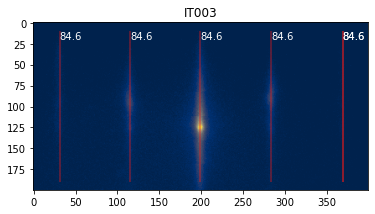

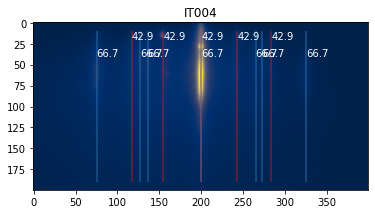

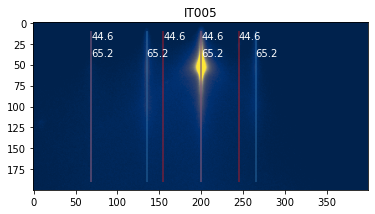

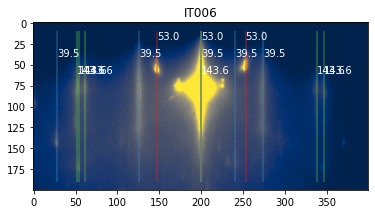

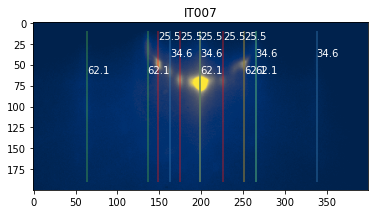

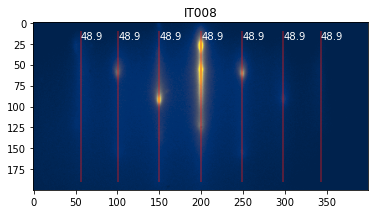

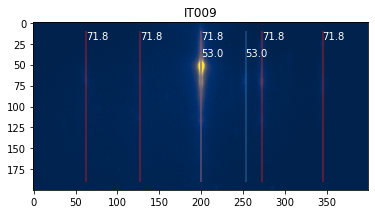

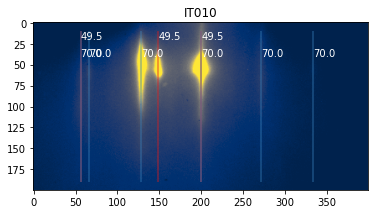

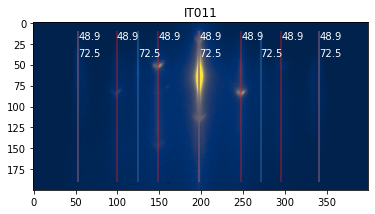

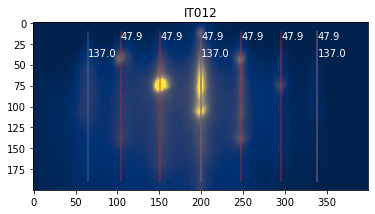

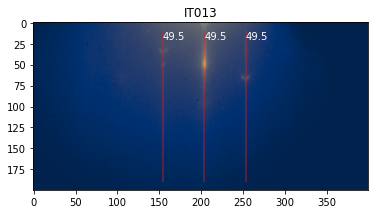

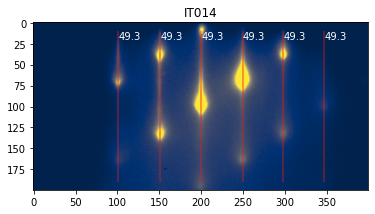

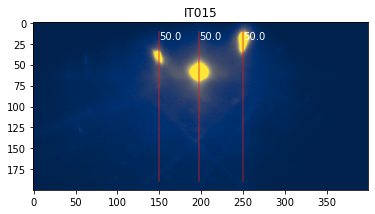

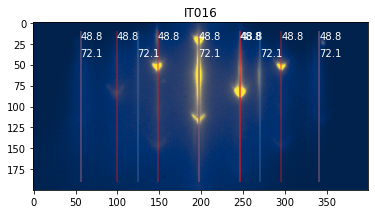

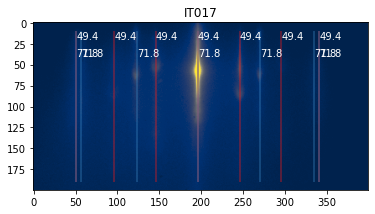

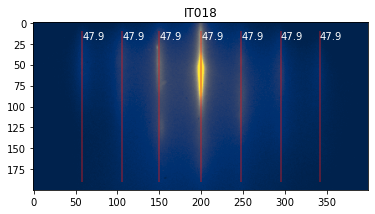

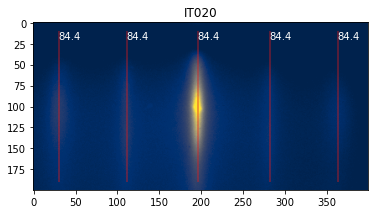

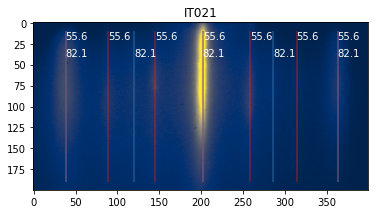

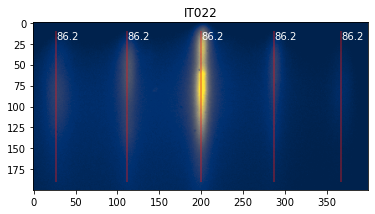

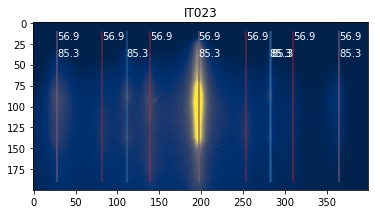

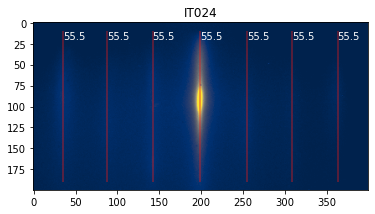

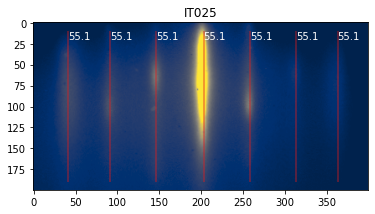

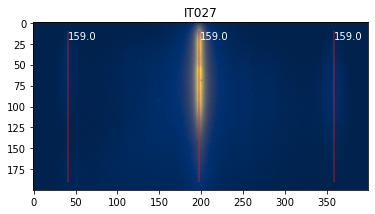

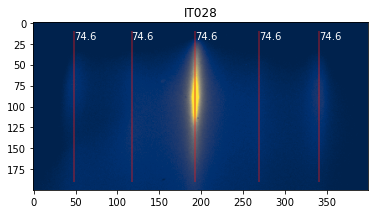

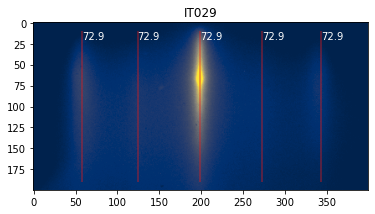

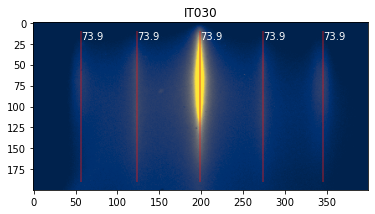

In [21]:
for name, rd in lastrds.items():
#     rd.
    rd.plot_peak_dist()
    plt.title(name)
    plt.show()

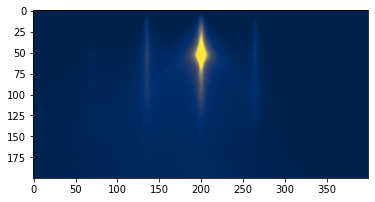

In [22]:
rdm = lastrds['IT005']
rdm.rd.plot_pattern()
plt.show()

In [23]:
lastrds.pop("IT015")
lastrds.pop("IT006")

In [24]:
from rhana.phaser.distance import RHEEDMaskDistancePhaser, DBSCANDistanceCluster

In [25]:
phaser = RHEEDMaskDistancePhaser(list(lastrds.values()))

In [26]:
phaser.run_cluster(eps=3, min_samples=1)

In [27]:
phaser.get_intensity_map()

In [28]:
x = [ exp_cons[k][1] for k in lastrds.keys() ] 
y = [ exp_cons[k][0] for k in lastrds.keys() ] 

IT_name = list(lastrds.keys())

In [29]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [30]:
xrd_overlay = {
    "line2": {"x":[500, 470, 470, 570], "y":[1e-6, 1e-4, 1e-2, 5e-1]},
    "line3": {"x":[700, 650, 620, 650], "y":[1e-6, 8e-5, 1e-2, 5e-1]},
    "line1": {"x":[250, 250], "y":[1e-6, 5e-1]},
    "line4": {"x":[850, 850], "y":[1e-6, 5e-1]},
    "line6": {"x":[250, 470, 650, 850], "y":[5e-4,1e-4, 8e-5, 7e-5]},
    "line5": {"x":[250, 470, 650, 850], "y":[1e-6,1e-6, 1e-6, 1e-6]},
}

In [31]:
xrd_overlay = {
    "line1": {"x":[472.5, 472.5, 472.5, 500, 550], "y":[1e-6, 1e-4, 5e-2, 1e-1, 5e-1]},
    "line2": {"x":[625, 625, 625, 625], "y":[1e-6, 8e-5, 1e-2, 5e-1]},
    "line3": {"x":[250, 470, 650, 850], "y":[5e-4,1e-4, 8e-5, 7e-5]},
}

In [32]:
name = [ f"{pexp}-{temp}" for pexp, temp in zip(-np.log10(y).astype(int), x) ]

In [33]:
IT_notaion_lookup = {n1:n2 for n1, n2 in zip(IT_name, name)}

In [34]:
IT_notaion_lookup["IT017"]

'5-600'

In [35]:
import colorlover

In [36]:
n_labels = len(np.unique(phaser.dc.labels))

all_multihotencoding = np.zeros( (len(phaser.rdms), n_labels ) )
all_percentage = np.zeros( (len(phaser.rdms), n_labels ) )

for i, rdm, in enumerate(phaser.rdms):
    all_multihotencoding[i, rdm.cluster_labels_unique] = 1
    all_percentage[i, rdm.cluster_labels_unique] = rdm.group_percent

In [37]:
all_percentage.shape

(24, 11)

In [38]:
colorlover.scales['11']['qual']

{'Paired': ['rgb(166,206,227)',
  'rgb(31,120,180)',
  'rgb(178,223,138)',
  'rgb(51,160,44)',
  'rgb(251,154,153)',
  'rgb(227,26,28)',
  'rgb(253,191,111)',
  'rgb(255,127,0)',
  'rgb(202,178,214)',
  'rgb(106,61,154)',
  'rgb(255,255,153)'],
 'Set3': ['rgb(141,211,199)',
  'rgb(255,255,179)',
  'rgb(190,186,218)',
  'rgb(251,128,114)',
  'rgb(128,177,211)',
  'rgb(253,180,98)',
  'rgb(179,222,105)',
  'rgb(252,205,229)',
  'rgb(217,217,217)',
  'rgb(188,128,189)',
  'rgb(204,235,197)']}

In [39]:
#"set3"
#"Paired"

folder = Path("publication/pie_phase")
folder.mkdir(exist_ok=True)

for i in range(len(all_percentage)):
    fig = go.Figure()
    fig.add_trace(
        go.Pie(
            labels = phaser.dc.mean_dists,
            values=all_percentage[i],
            hoverinfo='label+percent+name',
            direction ='clockwise',
            sort=False,
            textinfo='none',
            marker_colors=colorlover.scales['11']['qual']['Paired'],
            opacity=1,
            showlegend=False,
        ),
    )
#     fig.show()
    fig.update_layout(go.Layout(
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    ))

    fig.write_image(str(folder/f"{name[i]}.png"))
    fig.write_html(str(folder/f"{name[i]}.html"))

In [53]:
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels = [f"{d:.2f}" for d in phaser.dc.mean_dists],
        values=all_percentage[i],
        hoverinfo='label+percent+name',
        direction ='clockwise',
        sort=False,
        textinfo='none',
        marker_colors=colorlover.scales['11']['qual']['Paired'],
        opacity=1,
        showlegend=True,
#         visible=False,
    ),
)
#     fig.show()
fig.update_layout(go.Layout(
    legend = dict(title="Distance (Pixel)"),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
))

fig.write_image(str(folder/f"legend.svg"))
fig.write_image(str(folder/f"legend.png"), scale=2)
fig.write_html(str(folder/f"legend.html"))

In [46]:
import plotly.express

In [49]:
save_folder = Path("publication")

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = np.array(x),
        y = np.array(y) * 3,
        text = np.array(name),
        showlegend = False,
        mode = "text"
    )    
)

fig.add_trace(
    go.Scatter(
        x = np.array(x),
        y = np.array(y),
        showlegend = False,
        mode = "markers"
    )    
)


fig.update_yaxes(title="P<sub>O<sub>2</sub></sub> (Torr)", type='log', exponentformat="power", range=(-6, 0))
fig.update_xaxes(dtick=50, title="T (°C)")


fig.update_layout(
    legend = dict(title="Distance (Pixel)"),
    template="plotly_white",
    
    xaxis = dict(
        tickmode = 'linear',        
        tick0 = 300,
        dtick = 50,
        ticks="outside",
#         mirror = True,
        showline=True,
        linewidth=1, linecolor='black'        
    ),
    yaxis = dict(
        ticks="outside",
#         mirror = True,       
        showline=True,
        linewidth=1, linecolor='black'        
    )
)

for i in range(1, 1+len(xrd_overlay.values())):
    color = plotly.express.colors.qualitative.Dark2[i]
    color = color.replace("rgb", "rgba")
    color = color[:-1] + ", 0.1)"
    
    fig.add_trace(
        go.Scatter(
            showlegend=False,
            x=xrd_overlay[f'line{i}']['x'],
            y=xrd_overlay[f'line{i}']['y'],
#             fill='tonexty',
#             fillcolor=color,
#             mode="none"
            line={"color":"black", "width":1, "dash":"dash"},
            opacity=0.8,
            mode="lines",
        )) # fill down to xaxis



fig.write_image(str(save_folder/f"phasemapping_backbone.svg"), height=581, width=1325)
fig.write_image(str(save_folder/f"phasemapping_backbone.png"), scale=2, height=581, width=1325)
fig.write_html(str(save_folder/f"phasemapping_backbone.html"))

fig


In [50]:
phaser.plot_intensity_map??

In [120]:
fig = phaser.plot_intensity_map(
    x, y, 
    name=name, 
    xlabel="T (°C)", 
    ylabel="P<sub>O<sub>2</sub></sub> (Torr)", 
    log_x=False, 
    log_y=True, 
    x_space=6.5,
    y_space=0.5,
    text_x_space=-0.5,
    text_y_space=2.5,
    max_num_row=6,
    reverse_x=False,
    reverse_y=False,
    scatter_size=15,
    cmap = colorlover.scales['11']['qual']['Paired']
)

fig.update_layout(
    legend = dict(title="Distance (Pixel)"),
    xaxis = dict(
        tickmode = 'linear',        
        tick0 = 300,
        dtick = 50,
        ticks="outside",
#         mirror = True,
        showline=True,
        linewidth=1, linecolor='black'        
    ),
    yaxis = dict(
        ticks="outside",
#         mirror = True,       
        showline=True,
        linewidth=1, linecolor='black'        
    )
)

for i in range(1, 1+len(xrd_overlay.values())):
    color = plotly.express.colors.qualitative.Dark2[i]
    color = color.replace("rgb", "rgba")
    color = color[:-1] + ", 0.1)"
    
    fig.add_trace(
        go.Scatter(
            showlegend=False,
            x=xrd_overlay[f'line{i}']['x'],
            y=xrd_overlay[f'line{i}']['y'],
#             fill='tonexty',
#             fillcolor=color,
#             mode="none"
            line={"color":"black", "width":1, "dash":"dash"},
            opacity=0.8,
            mode="lines",
        )) # fill down to xaxis

    
fig

In [109]:
import plotly.io as pio

In [110]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [106]:
!mkdir -p result

In [107]:
fig.write_html("result/phase_mapping.html")

In [113]:
!conda install -c plotly plotly-orca

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/aurora/anaconda3/envs/fastaiv2

  added / updated specs:
    - plotly-orca


The following NEW packages will be INSTALLED:

  plotly-orca        plotly/linux-64::plotly-orca-1.3.1-1

The following packages will be UPDATED:

  ca-certificates                      2020.12.8-h06a4308_0 --> 2021.4.13-h06a4308_1
  openssl                                 1.1.1i-h27cfd23_0 --> 1.1.1k-h27cfd23_0


Proceed ([y]/n)? 

In [ ]:
fig.write_image("result/phase_mapping.svg")

In [ ]:
fig.write_image("result/phase_mapping.png")

# Classicfication with XRD map

In [31]:
n_labels = len(np.unique(phaser.dc.labels))

all_multihotencoding = np.zeros( (len(phaser.rdms), n_labels ) )
all_percentage = np.zeros( (len(phaser.rdms), n_labels ) )

for i, rdm, in enumerate(phaser.rdms):
    all_multihotencoding[i, rdm.cluster_labels_unique] = 1
    all_percentage[i, rdm.cluster_labels_unique] = rdm.group_percent


In [37]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [55]:
sil_results = []
for n_clusters in range(2, 11):
    hie = AgglomerativeClustering(n_clusters=n_clusters, affinity='l1', linkage='average')
    hie_labels = hie.fit_predict(all_percentage)
    score = sklearn.metrics.silhouette_score(all_percentage, hie_labels, metric='l1')
    sil_results.append((n_clusters, score))

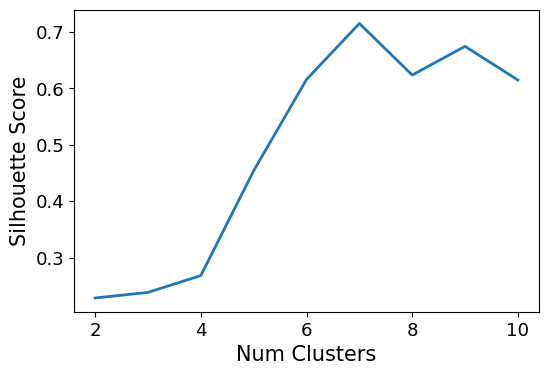

In [56]:
fig, ax = plt.subplots(dpi=100)
ax.plot( [s[0] for s in sil_results], [s[1] for s in sil_results], linewidth=2 )
ax.set_xlabel("Num Clusters", fontdict={"size":15})
ax.set_ylabel("Silhouette Score", fontdict={"size":15})
ax.tick_params(axis='both', labelsize=13)
fig.savefig("Cluster_Silhouette_Score.png")

In [57]:
n_clusters = 7

In [58]:
dbscan = DBSCAN(eps=0.2, metric="l1")
hie = AgglomerativeClustering(n_clusters=n_clusters, affinity='l1', linkage='average')
kmean = KMeans(n_clusters=n_clusters, )

In [40]:
g_mix = GaussianMixture(n_components=n_clusters, covariance_type='full')

In [59]:
dbscan_labels = dbscan.fit_predict(all_percentage)
hie_labels = hie.fit_predict(all_percentage)
kmean_labels = kmean.fit_predict(all_percentage)

In [42]:
g_mix_labels = g_mix.fit_predict(all_percentage, )
g_mix_scores = g_mix.score_samples(all_percentage)

In [44]:
# phaser.plot_intensity_map??

In [51]:
phaser.plot_intensity_map??

In [122]:
labels = hie_labels
probs = 50

fig = go.Figure()

for l in np.unique(labels):
    mask = np.where(labels == l)[0]    
    fig.add_trace(
        go.Scatter(
            x=np.array(x)[mask],
            y=np.array(y)[mask],
            mode='markers',
            marker=go.scatter.Marker(size=probs),
            name=f"{l+1}"
    ))

fig.add_trace(
    go.Scatter(
        x=np.array(x),
        y=np.array(y),
        text = np.array(name),
        showlegend=False,
        mode="text"
    )    
)
    
for i in range(1, 1+len(xrd_overlay.values())):
    color = plotly.express.colors.qualitative.Dark2[i]
    color = color.replace("rgb", "rgba")
    color = color[:-1] + ", 0.1)"
    
    fig.add_trace(
        go.Scatter(
            showlegend=False,
            x=xrd_overlay[f'line{i}']['x'],
            y=xrd_overlay[f'line{i}']['y'],
#             fill='tonexty',
#             fillcolor=color,
#             mode="none"
            line={"color":"black", "width":1, "dash":"dash"},
            opacity=0.8,
            mode="lines",
        )) # fill down to xaxis
    
    fig.update_layout(
        showlegend=True,
        template="plotly_white",
        legend=go.layout.Legend(itemsizing='constant', title="Cluster id"),
        xaxis = dict(
            tickmode = 'linear',        
            tick0 = 300,
            dtick = 50,
            ticks="outside",
    #         mirror = True,
            showline=True,
            linewidth=1, linecolor='black'        
        ),
        yaxis = dict(
            ticks="outside",
    #         mirror = True,       
            showline=True,
            linewidth=1, linecolor='black'        
        )
    )
    
    
    fig.update_yaxes(title="P<sub>O<sub>2</sub></sub> (Torr)", type='log', exponentformat="power")
    fig.update_xaxes(dtick=50, title="T (°C)")
fig

In [167]:
xrd_labels_name = (
    ("IT029", "IT028" , "IT027", "IT021", "IT025", "IT023"),
    ("IT013", "IT024", "IT018", "IT012", "IT008", "IT014", "IT011"),
    
    ("IT003", "IT005"),
    ("IT010", "IT009", "IT007"),
    ("IT030", "IT020", "IT022"),
    ("IT004", "IT016", "IT017"),
    
 )

xrd_labels = [ ]
for n in name:
    for i, xln in enumerate(xrd_labels_name):
        if n in xln:
            xrd_labels.append(i)
            break

In [165]:
_xrd_labels = xrd_labels

In [155]:
sklearn.__version__

'0.23.2'

In [169]:
#https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score, adjusted_mutual_info_score

In [163]:
print(adjusted_rand_score(hie_labels, xrd_labels))

0.358974358974359


In [170]:
print(adjusted_mutual_info_score(hie_labels, xrd_labels))

0.39012883214943406
